05/12/2020

to do is to add the tf colors into the plots

In [14]:
library(tidyverse)
library(pheatmap)


library(clusterProfiler)
library(ReactomePA)
library(annotate)
library( org.Hs.eg.db ) 
library(AnnotationDbi) 
library(Biobase)


save_pheatmap_png <- function(x, filename, width=1200, height=1000, res = 200) {
  png(filename, width = width, height = height, res = res)
  grid::grid.newpage()
  grid::grid.draw(x$gtable)
  dev.off()
}
save_pheatmap_pdf <- function(x, filename, width=7, height=7) {
   stopifnot(!missing(x))
   stopifnot(!missing(filename))
   pdf(filename, width=width, height=height)
   grid::grid.newpage()
   grid::grid.draw(x$gtable)
   dev.off()
}

In [2]:
save_prefix = '../data/processed/fig6_cancer/'

In [3]:
# tfs_short = sort(unique(read.csv('../data/processed/fig3_footprinting/overall_df_go_filt_with_groups.csv',header=TRUE)$tf))
# tfs = read.csv('../data/processed/fig3_footprinting/select_TFs.csv',header=FALSE)$V1
# length(tfs_short)
# length(tfs)

In [4]:
tissue_colors = read.csv( '../data/processed/fig3_footprinting/tissue_colors.csv',stringsAsFactors=F)
tissue_colors

tissue,color
<chr>,<chr>
Airway,#4A195D
Astrocytes,#A8EAFF
Bladder,#C2A7D2
Colon,#F5AF1A
Esophageal,#FFDA89
GDSD0,#240201
GDSD3,#4E0A05
GDSD6,#A22633
GM12878,#8F99AC


In [5]:
# rna_tpm_file_tissue = '../data/interim/rna/tissue_tpm_sym.csv'
# rna_df_tissue = read.csv(rna_tpm_file_tissue, row.names=1,stringsAsFactors=F,check.names = FALSE)
# rna_df_tissue_log = log2(rna_df_tissue+1e-2)
# rna_df_tissue_norm = as.data.frame(scale(rna_df_tissue_log, center = TRUE, scale = TRUE))
# # rna_df_tissue_norm

In [6]:
# colnames(rna_df_tissue_norm)

In [7]:
THRES=0.1

In [8]:
dir = '../data/processed/fig6_cancer/irf_manual/'
list.files(dir,pattern='*stability_score.csv')

[1] "test_cancer_GDSD6_stability_score.csv"      
[2] "test_cancer_Melanocytes_stability_score.csv"

In [9]:
read_stability_file = function(filepath, thres=THRES, num_element = 2){
#     irf_results_file = paste0(dir, 'test_',tissue,'_',group,'_stability_score.csv')
    file = tail(strsplit(filepath, '/')[[1]],n=1)
    arr = strsplit(file, '_')[[1]]
    tissue = arr[2]
    group = arr[3]
    
    
    irf_results_df = read.csv(filepath,header=FALSE)
    colnames(irf_results_df) = c('interaction','score')
    irf_results_df$interaction = as.character(irf_results_df$interaction )
    irf_results_df$num_elements =  sapply(irf_results_df$interaction, function (x) length(strsplit(x,'::')[[1]]))
    irf_results_df = irf_results_df%>%
        filter(num_elements == num_element)%>%
        filter(score>thres)
    irf_results_df$num_int = 1:dim(irf_results_df)[1]
    irf_results_df$tissue = tissue                                     
    irf_results_df$group = group 
    if (num_element==2){
    irf_results_df = irf_results_df %>% 
        separate( interaction, into = c("tf1", "tf2"), sep = "::")%>%
        separate( tf1, into = c("tf1_name", "tf1_type"), sep = "_")%>%
        separate( tf2, into = c("tf2_name", "tf2_type"), sep = "_")}
    return(irf_results_df)
}

In [31]:
stability_df_overall =data.frame()
for (file in list.files(dir,pattern='*stability_score.csv')){
    
    irf_filepath = paste0(dir, file)
    
    stability_df = read_stability_file(irf_filepath,thres=0.05)
    stability_df_overall = rbind(stability_df_overall, stability_df)

}
# stability_df_overall = filter(stability_df_overall, (tf1_name %in% tfs_short) | (tf2_name %in% tfs_short) )
stability_df_overall$num_int_overall = 1:dim(stability_df_overall)[1]
stability_df_overall = left_join(stability_df_overall, tissue_colors, by=c("group"="tissue"))
dim(stability_df_overall)

[1] 34 11

In [32]:
stability_df_overall

tf1_name,tf1_type,tf2_name,tf2_type,score,num_elements,num_int,tissue,group,num_int_overall,color
<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<chr>
SP4,loop,SOX2,loop,0.50000000,2,1,cancer,GDSD6,1,#A22633
ELF3,loop,SP4,loop,0.20000000,2,2,cancer,GDSD6,2,#A22633
SP4,loop,ZSCAN31,loop,0.20000000,2,3,cancer,GDSD6,3,#A22633
SP4,loop,ZNF341,loop,0.20000000,2,4,cancer,GDSD6,4,#A22633
SMAD4,loop,SP4,loop,0.16666667,2,5,cancer,GDSD6,5,#A22633
NR1H3,loop,SP4,loop,0.13333333,2,6,cancer,GDSD6,6,#A22633
HOXB7,loop,SP4,loop,0.10000000,2,7,cancer,GDSD6,7,#A22633
SP2,loop,SP4,loop,0.10000000,2,8,cancer,GDSD6,8,#A22633
SP4,loop,ZNF467,loop,0.06666667,2,9,cancer,GDSD6,9,#A22633


In [33]:
stability_df_overall_long1 = stability_df_overall[,c("tf1_name",'score','num_int_overall','tissue','group','color')]
colnames(stability_df_overall_long1) = c("tf_name",'score','num_int_overall','tissue','group','color')
stability_df_overall_long2 = stability_df_overall[,c("tf2_name",'score','num_int_overall','tissue','group','color')]
colnames(stability_df_overall_long2) = c("tf_name",'score','num_int_overall','tissue','group','color')
stability_df_overall_long = rbind(stability_df_overall_long1, stability_df_overall_long2)

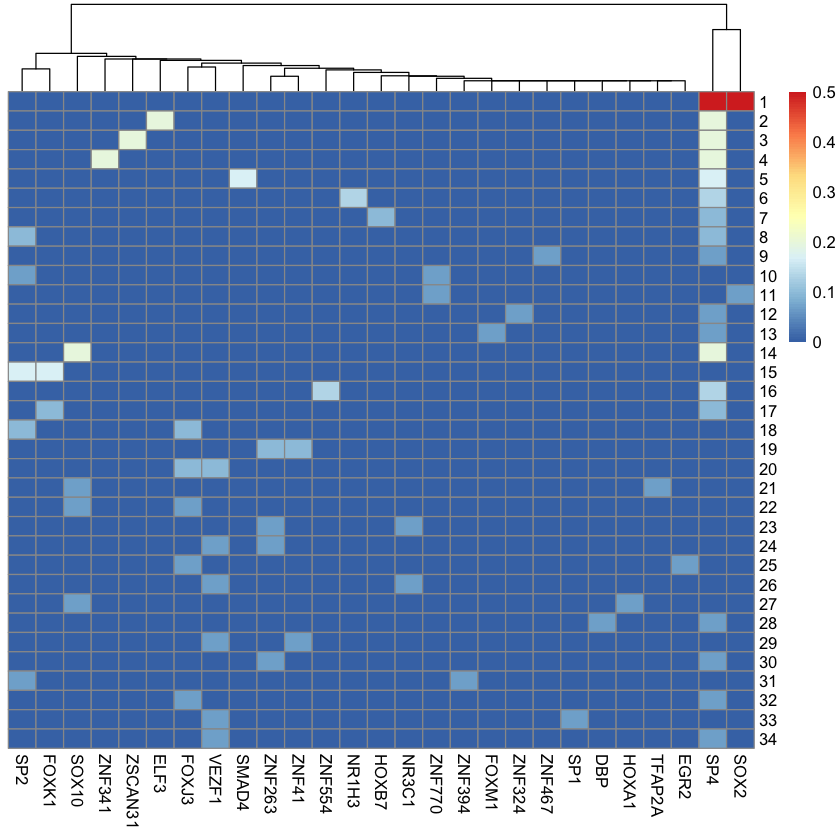

In [34]:
stability_df_overall_spread = stability_df_overall_long%>%
    dplyr::select(tf_name, score,num_int_overall)%>%
    pivot_wider(names_from = tf_name, values_from = score)%>%
    column_to_rownames("num_int_overall")
stability_df_overall_spread[is.na(stability_df_overall_spread)] = 0
p = pheatmap(stability_df_overall_spread,
        cluster_row=F)
tf_order = colnames(stability_df_overall_spread)[p$tree_col[['order']]]

In [35]:
tissue_colors_filt = filter(tissue_colors, tissue %in%unique(stability_df_overall_long$group))
tissue_colors_filt

tissue,color
<chr>,<chr>
GDSD6,#A22633
Melanocytes,#189BDD


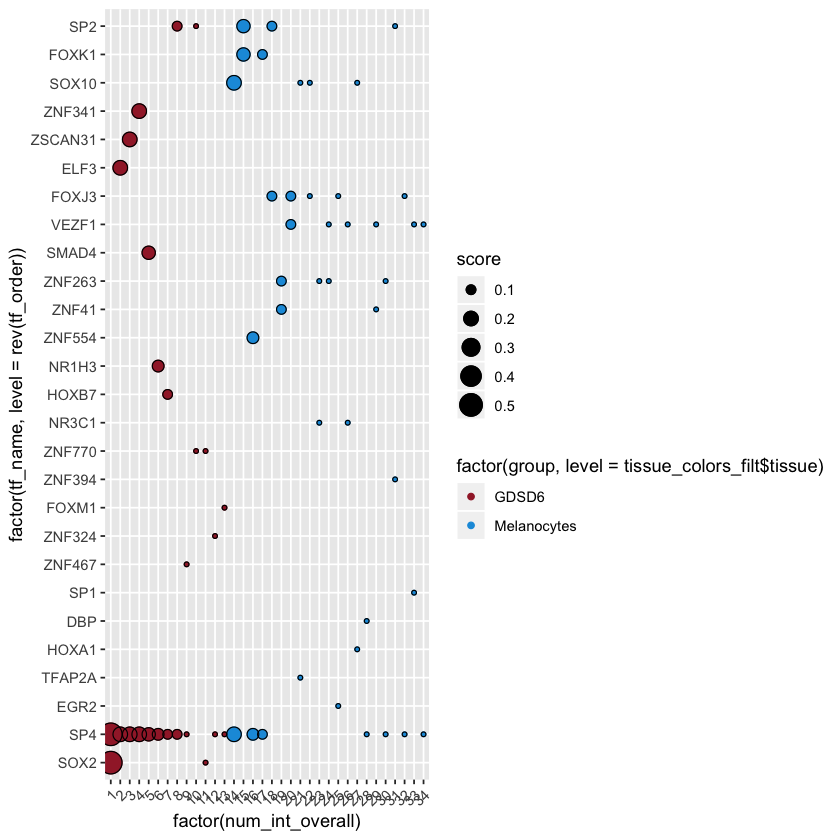

In [45]:
p = ggplot(stability_df_overall_long, aes(x= factor(num_int_overall),y=factor(tf_name,level=rev(tf_order)),
                                          color=factor(group, level=tissue_colors_filt$tissue)))+
    geom_point(aes(size=score))+
    scale_color_manual(values=tissue_colors_filt$color)+
    geom_point(aes(size=score),colour="black",pch=21)+
    theme(axis.text.x = element_text(angle = 45,hjust=1))
p 
ggsave(file = paste0(save_prefix, "stability_df_by_tissue_pairs.eps"),height=5, width=10)
#

In [36]:
rna_tpm_file_tissue = '../data/interim/rna/tissue_tpm_sym.csv'
rna_df_tissue = read.csv(rna_tpm_file_tissue, row.names=1,stringsAsFactors=F,check.names = FALSE)
rna_df_tissue = rna_df_tissue[tf_order,]
rna_df_tissue$SCC = rowMeans(rna_df_tissue[,c('A431-CTRLi','CAL27-CTRLi','SCC13-CTRLi')])
rna_df_tissue$MC = rowMeans(rna_df_tissue[,c('COLO_SCR_DMSO','SKMEL5_SCR_DMSO','WM_SCR_DMSO')])
rna_df_tissue_log = log2(rna_df_tissue+1e-2)
rna_df_tissue_norm = as.data.frame(scale(rna_df_tissue_log, center = TRUE, scale = TRUE))
rna_df_tissue_norm[rna_df_tissue_norm>2] = 2
rna_df_tissue_norm[rna_df_tissue_norm < -2] = -2
head(rna_df_tissue_norm)

,A431-CTRLi,A431-p63i,Airway,Astrocytes,Bladder,CAL27-CTRLi,CAL27-p63i,COLO_SCR_DMSO,COLO_SCR_PLX,COLO_shMITF_DMSO,⋯,SKMEL5_shMITF-DMSO,SKMEL5_shMITF_PLX,Thyroid,Uterine,WM_SCR_DMSO,WM_SCR_PLX,WM_shMITF_DMSO,WM_shMITF_PLX,SCC,MC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SP2,-0.1584366,0.2762422,-0.1257322,-0.3457766,-0.4246659,0.2871081,0.03214319,0.079743341,0.062568078,0.02039308,⋯,0.01004694,-0.01141903,0.09967348,-0.2234945,-0.04035806,0.10590883,0.004648821,0.03744889,-0.1125405,-0.03080020
FOXK1,-0.1573462,-0.2108644,0.5398168,-0.2959106,0.3434372,0.3083949,-0.23786455,-0.008192842,0.009074157,0.13654583,⋯,0.26749053,-0.01033005,0.34470225,0.1411109,-0.11612083,0.05170548,-0.063071271,-0.06656184,-0.1147999,0.04411849
SOX10,-2.0000000,-1.8866799,-2.0000000,-1.4317874,-1.6015603,-2.0000000,-2.00000000,1.324579816,1.330983188,1.21497616,⋯,1.51981393,1.50833495,-2.00000000,-1.9803292,1.35019514,1.35345396,1.381658232,1.45165008,-2.0000000,1.36599063
ZNF341,-0.4140981,-0.5273083,-0.8440450,-1.2046884,-1.0113517,-0.5703274,-0.59200696,-0.872103030,-0.638170026,-1.08553929,⋯,-0.87468214,-0.63344480,-0.50873802,-0.9867896,-0.95502025,-0.67553063,-0.801653562,-0.95863760,-0.6137644,-0.88389023
ZSCAN31,0.1406775,0.3576171,-0.8885157,-0.7142262,-0.3019662,-0.2786563,-0.04847758,-1.272906157,-0.972743755,-1.49469390,⋯,-1.26363896,-1.27464932,-0.62032182,-0.2977053,-1.26487288,-0.97920189,-1.056609583,-1.01078473,-0.2481641,-1.35269693
ELF3,1.9144275,1.7176075,0.1982975,-0.7091279,0.5798357,1.4240096,2.00000000,-2.000000000,-2.000000000,-2.00000000,⋯,-2.00000000,-2.00000000,1.70514369,1.1342259,-2.00000000,-2.00000000,-2.000000000,-2.00000000,1.8424029,-2.00000000


In [38]:
tissues = c('GDSD6','SCC',#'A431-CTRLi','CAL27-CTRLi','SCC13-CTRLi',
           'Melanocytes','MC')#'COLO_SCR_DMSO','SKMEL5_SCR_DMSO','WM_SCR_DMSO')

In [43]:
rna_df_tissue['SP4',tissues]#c('GDSD0','GDSD3','GDSD6','SCC','A431-CTRLi','CAL27-CTRLi','SCC13-CTRLi')]

,GDSD6,SCC,Melanocytes,MC
,<dbl>,<dbl>,<dbl>,<dbl>
SP4,0.93,1.99,0.995,2.2


pdf 
  2

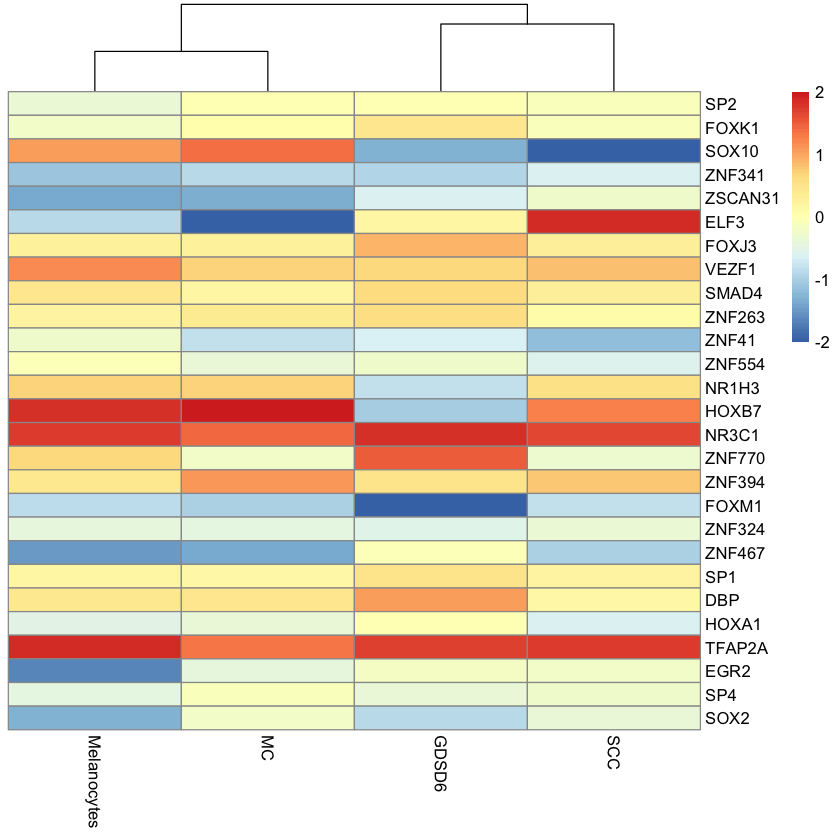

In [48]:
p_genexp = pheatmap(rna_df_tissue_norm[tf_order,tissues],cluster_rows=F)
save_pheatmap_pdf(p_genexp, paste0(save_prefix, 'rna_tf_heatmap.pdf'), width=5, height=12) 

In [82]:
# split_names = data.frame(t(sapply(irf_results_df$interaction, function (x) strsplit(x,'::')[[1]])))
# colnames(split_names) = c('tf1','tf2')
# within(split_names, tf1<-data.frame(do.call('rbind', strsplit(as.character(tf1), '_', fixed=TRUE))))

                                  
# #,col.names=c('tf1','tf2'))

In [49]:
# p_dot_tissue = ggplot(overall_df_go_filt_with_groups, aes(x=factor(Description,level=go_term_ordering_sel), y = factor(tf,level=tf_ordering),
#                                                    color=factor(tissue, level=tissue_colors$tissue)))+
#     geom_point(aes(size=log10_pval))+
#     scale_color_manual(values=tissue_colors$color)+
#     theme(axis.text.x = element_text(angle = 45,hjust=1))
# p_dot_tissue
# ggsave(file = paste0(save_prefix, "overall_df_regrouped_go_reduced_bytissue.eps"),height=20, width=15)
# # # level_order <- c('virginica', 'versicolor', 'setosa') #this vector might be useful for other plots/analyses
# # ggplot(overall_df_regrouped_go, aes(x = factor(Description, y = tf)) + 
# #      geom_point(aes( size=log10_pval)) +#,colour="black",pch=21)
# #   theme(axis.text.x = element_text(angle = 45))
# # #   scale_size_area(max_size = 10)

# get go terms associateed with stability score pairs chosen

05/14/2020

In [11]:
stability_df_overall

tf1_name,tf1_type,tf2_name,tf2_type,score,num_elements,num_int,tissue,group,num_int_overall,color
<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<chr>
SP4,loop,SOX2,loop,0.50000000,2,1,cancer,GDSD6,1,#A22633
ELF3,loop,SP4,loop,0.20000000,2,2,cancer,GDSD6,2,#A22633
SP4,loop,ZSCAN31,loop,0.20000000,2,3,cancer,GDSD6,3,#A22633
SP4,loop,ZNF341,loop,0.20000000,2,4,cancer,GDSD6,4,#A22633
SMAD4,loop,SP4,loop,0.16666667,2,5,cancer,GDSD6,5,#A22633
NR1H3,loop,SP4,loop,0.13333333,2,6,cancer,GDSD6,6,#A22633
HOXB7,loop,SP4,loop,0.10000000,2,7,cancer,GDSD6,7,#A22633
SP2,loop,SP4,loop,0.10000000,2,8,cancer,GDSD6,8,#A22633
SP4,loop,ZNF467,loop,0.06666667,2,9,cancer,GDSD6,9,#A22633


In [15]:
all_genes = read.csv(paste0('../data/processed/fig1/rna/','all', '_genes.csv'),header=FALSE,stringsAsFactors=F)$V1
all_entrez = bitr(all_genes, fromType="SYMBOL", toType="ENTREZID", OrgDb="org.Hs.eg.db")$ENTREZID


'select()' returned 1:many mapping between keys and columns



In [112]:
find_genes = function(row,col_to_check='tissue',cancer='', bck_genes_entrez = all_entrez, crm_file_loc= '../data/processed/tissue_crms/pro_loop_tissue/',crm_file_suffix='_crm.csv'){
#     bck_genes = read.csv(paste0('../data/processed/fig1/rna/',group, '_genes.csv'),header=FALSE,stringsAsFactors=F)$V1
    if (nchar(cancer)>0){
        crm_df = read.csv(paste0(crm_file_loc, cancer, crm_file_suffix),row.names=1)        
        print(row[col_to_check])
    }
    else{
        crm_df = read.csv(paste0(crm_file_loc, row[col_to_check], crm_file_suffix),row.names=1)
        print(cancer)
    }
    tf1_col = paste(row['tf1_name'], row['tf1_type'], sep='_')
    tf2_col = paste(row['tf2_name'], row['tf2_type'], sep='_')
    print(tf1_col)
    print(tf2_col)
    genes_tf1 = rownames(crm_df)[crm_df[,tf1_col]>0]
    genes_tf2 = rownames(crm_df)[crm_df[,tf2_col]>0]
    target_genes = intersect(genes_tf1,genes_tf2)
    print(target_genes)
    target_genes_entrez = bitr(target_genes, fromType="SYMBOL", toType="ENTREZID", OrgDb="org.Hs.eg.db")$ENTREZID
    print(length(target_genes_entrez))
    return(target_genes_entrez)
#     ego <- enrichGO(gene          = target_genes_entrez,
#     universe      = bck_genes_entrez,
#     OrgDb         = org.Hs.eg.db,
#     ont           = "BP",
#     pAdjustMethod = "BH",
#     pvalueCutoff  = 0.05,
#     qvalueCutoff  = 0.2,
#     readable=TRUE)
#     er_df = data.frame(ego)
#     print(dim(er_df)[1])
#     return (er_df)
}

In [21]:
crm_df = read.csv(paste0( '../data/processed/tissue_crms/pro_loop_tissue/', 'GDSD6', '_crm.csv'),row.names=1)

In [ ]:
st

In [106]:
cancer=''
print(nchar(cancer))
if (nchar(cancer)>0){
    print('w')
}

[1] 0


In [91]:
stability_df_overall[15,]

,tf1_name,tf1_type,tf2_name,tf2_type,score,num_elements,num_int,tissue,group,num_int_overall,color
,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<chr>
15,FOXK1,loop,SP2,loop,0.1666667,2,2,cancer,Melanocytes,15,#189BDD


In [109]:
rna_df_tissue['SP2', c('GDSD0','GDSD3','GDSD6','SCC','A431-CTRLi','CAL27-CTRLi','SCC13-CTRLi',
           'Melanocytes','MC','COLO_SCR_DMSO','SKMEL5_SCR_DMSO','WM_SCR_DMSO')]
rna_df_tissue['FOXK1', c('GDSD0','GDSD3','GDSD6','SCC','A431-CTRLi','CAL27-CTRLi','SCC13-CTRLi',
           'Melanocytes','MC','COLO_SCR_DMSO','SKMEL5_SCR_DMSO','WM_SCR_DMSO')]

,GDSD0,GDSD3,GDSD6,SCC,A431-CTRLi,CAL27-CTRLi,SCC13-CTRLi,Melanocytes,MC,COLO_SCR_DMSO,SKMEL5_SCR_DMSO,WM_SCR_DMSO
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SP2,0.93,1.32,1.91,2.578333,2.21,3.715,1.81,1.315,2.448333,2.945,1.86,2.54


,GDSD0,GDSD3,GDSD6,SCC,A431-CTRLi,CAL27-CTRLi,SCC13-CTRLi,Melanocytes,MC,COLO_SCR_DMSO,SKMEL5_SCR_DMSO,WM_SCR_DMSO
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FOXK1,3.835,3.095,4.935,2.568333,2.215,3.86,1.63,1.67,2.826667,2.5,3.805,2.175


In [131]:
# mc_genes = find_genes(stability_df_overall[15,],col_to_check='group')
mm_genes = find_genes(stability_df_overall[15,],cancer='WM_SCR_DMSO')


   tissue
15 cancer
[1] "FOXK1_loop"
[1] "SP2_loop"
   [1] "A4GNT"           "AATK"            "ABCA10"          "ABCA5"          
   [5] "ABCA7"           "ABCB4"           "ABCB5"           "ABCC2"          
   [9] "ABCG2"           "ABHD12B"         "ABHD2"           "ABI3"           
  [13] "ACADVL"          "ACIN1"           "ACLY"            "ACSBG1"         
  [17] "ACSL3"           "ACTA2"           "ACTG1"           "ACTN1"          
  [21] "ADA"             "ADAMTSL4-AS1"    "ADCY9"           "ADD3"           
  [25] "ADM5"            "ADRB1"           "AKIP1"           "AKNA"           
  [29] "AKR1C2"          "AKR1E2"          "AKT1S1"          "ALDH1B1"        
  [33] "ALG9"            "AMHR2"           "AMIGO1"          "AMZ2"           
  [37] "ANAPC15"         "ANGEL1"          "ANGPTL6"         "ANKDD1A"        
  [41] "ANKDD1B"         "ANKRD1"          "ANKRD35"         "ANKRD53"        
  [45] "ANP32B"          "ANTXR1"          "ANXA2"           "AP3M2"          


'select()' returned 1:1 mapping between keys and columns



[1] 1152


In [115]:
length(mc_genes)
length(mm_genes)
length(intersect(mc_genes,mm_genes))
length(setdiff(mc_genes,mm_genes))
length(setdiff(mm_genes,mc_genes))

[1] 79

[1] 501

[1] 39

[1] 40

[1] 462

In [116]:
list_SP2_FOXK1_mc = list(
    common=intersect(mc_genes,mm_genes),
    mc_only= setdiff(mc_genes,mm_genes),
    mm_only=setdiff(mm_genes,mc_genes)
)

In [129]:
write.csv(bitr(list_SP2_FOXK1_mc$common, fromType="ENTREZID", toType="SYMBOL", OrgDb="org.Hs.eg.db")$SYMBOL, paste0(save_prefix,'list_SP2_FOXK1_mc_mm_shared.csv'))
write.csv(bitr(list_SP2_FOXK1_mc$mc_only, fromType="ENTREZID", toType="SYMBOL", OrgDb="org.Hs.eg.db")$SYMBOL, paste0(save_prefix,'list_SP2_FOXK1_mc_mm_mc_only.csv'))
write.csv(bitr(list_SP2_FOXK1_mc$mm_only, fromType="ENTREZID", toType="SYMBOL", OrgDb="org.Hs.eg.db")$SYMBOL, paste0(save_prefix,'list_SP2_FOXK1_mc_mm_mm_only.csv'))

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns



In [125]:
ck_go_bp <- compareCluster(geneCluster = list_SP2_FOXK1_mc, fun = "enrichGO", 
                                pAdjustMethod='BH', # 'BH',
                                pvalueCutoff  = 0.5,
                                qvalueCutoff  = 0.5,#0.05,
                                OrgDb='org.Hs.eg.db', 
                                ont = "BP",
                                readable=TRUE)

In [126]:
write.csv(data.frame(ck_go_bp), paste0(save_prefix,'list_SP2_FOXK1_mc_mm_go_bp.csv'))


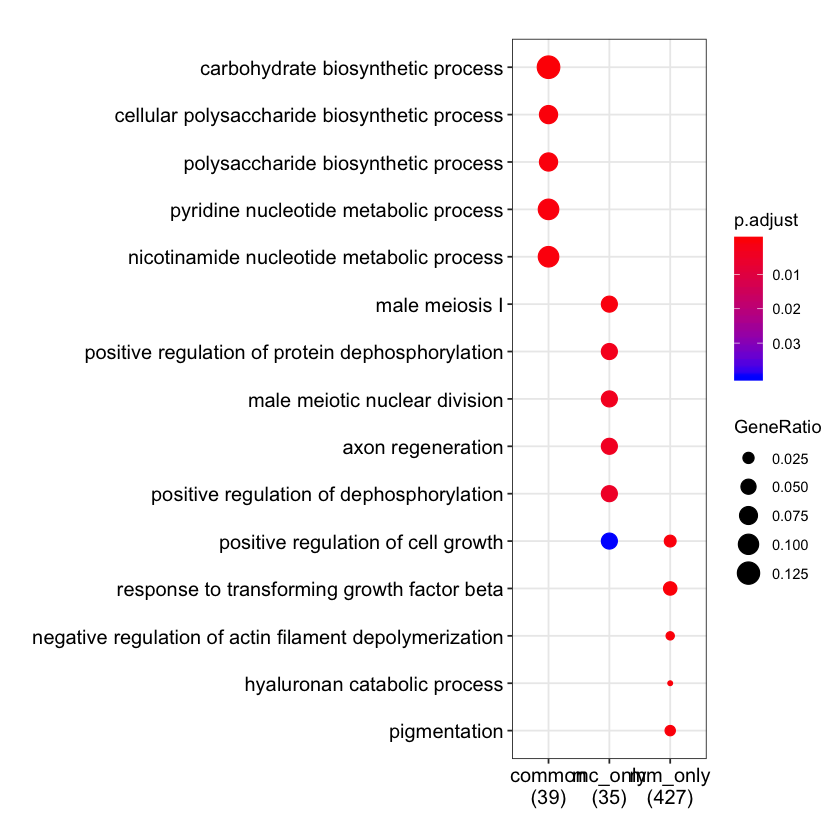

In [118]:
dotplot(ck_go_bp)

# SP4 vignette

not expressed in normal tissues

find where SP4 footprints are in certain promoters then do a go term on those genes

In [93]:
rna_df_tissue['SP4', c('GDSD0','GDSD3','GDSD6','SCC','A431-CTRLi','CAL27-CTRLi','SCC13-CTRLi',
           'Melanocytes','MC','COLO_SCR_DMSO','SKMEL5_SCR_DMSO','WM_SCR_DMSO')]

,GDSD0,GDSD3,GDSD6,SCC,A431-CTRLi,CAL27-CTRLi,SCC13-CTRLi,Melanocytes,MC,COLO_SCR_DMSO,SKMEL5_SCR_DMSO,WM_SCR_DMSO
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SP4,0.715,0.62,0.93,1.99,1.77,2.99,1.21,0.995,2.2,1.545,1.85,3.205


In [63]:
list_entrez = list()
for (tissue in c('GDSD0','GDSD3','GDSD6','A431-CTRLi','CAL27-CTRLi','SCC13-CTRLi',
           'Melanocytes','COLO_SCR_DMSO','SKMEL5_SCR_DMSO','WM_SCR_DMSO')){
    foot_df = read.csv(paste0('../data/interim/annon/promoter_footprinting/promoter_',tissue,'_annon.bed'),sep='\t',header=FALSE)
    target_genes = unique(foot_df[grepl('SP4_HUMAN',foot_df$V8),]$V4)
    target_genes_entrez = bitr(target_genes, fromType="SYMBOL", toType="ENTREZID", OrgDb="org.Hs.eg.db")$ENTREZID
    list_entrez[[tissue]] = target_genes_entrez
    print(tissue)
    print(length(target_genes))
    print(length(target_genes_entrez))
}

# SP4_HUMAN

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(target_genes, fromType = "SYMBOL", toType = "ENTREZID", :
“12.98% of input gene IDs are fail to map...”


[1] "GDSD0"
[1] 416
[1] 362


'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(target_genes, fromType = "SYMBOL", toType = "ENTREZID", :
“13.83% of input gene IDs are fail to map...”


[1] "GDSD3"
[1] 405
[1] 349


'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(target_genes, fromType = "SYMBOL", toType = "ENTREZID", :
“12.03% of input gene IDs are fail to map...”


[1] "GDSD6"
[1] 424
[1] 373


'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(target_genes, fromType = "SYMBOL", toType = "ENTREZID", :
“12.44% of input gene IDs are fail to map...”


[1] "A431-CTRLi"
[1] 442
[1] 387


'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(target_genes, fromType = "SYMBOL", toType = "ENTREZID", :
“12.96% of input gene IDs are fail to map...”


[1] "CAL27-CTRLi"
[1] 432
[1] 376


'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(target_genes, fromType = "SYMBOL", toType = "ENTREZID", :
“12.53% of input gene IDs are fail to map...”


[1] "SCC13-CTRLi"
[1] 423
[1] 370


'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(target_genes, fromType = "SYMBOL", toType = "ENTREZID", :
“13.11% of input gene IDs are fail to map...”


[1] "Melanocytes"
[1] 244
[1] 212


'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(target_genes, fromType = "SYMBOL", toType = "ENTREZID", :
“9.69% of input gene IDs are fail to map...”


[1] "COLO_SCR_DMSO"
[1] 382
[1] 345


'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(target_genes, fromType = "SYMBOL", toType = "ENTREZID", :
“10.91% of input gene IDs are fail to map...”


[1] "SKMEL5_SCR_DMSO"
[1] 394
[1] 351


'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(target_genes, fromType = "SYMBOL", toType = "ENTREZID", :
“12.22% of input gene IDs are fail to map...”


[1] "WM_SCR_DMSO"
[1] 401
[1] 352


In [74]:
list_entrez_SCC = list(GDS0=setdiff(list_entrez$GDSD0,list_entrez$`A431-CTRLi` ), 
                        "A431-CTRLi"=setdiff(list_entrez$`A431-CTRLi`,list_entrez$GDSD0 ))

In [73]:
length(list_entrez$GDSD0)
length(list_entrez$`A431-CTRLi`)
length(setdiff(list_entrez$GDSD0,list_entrez$`A431-CTRLi` ))
length(setdiff(list_entrez$`A431-CTRLi`,list_entrez$GDSD0 ))
length(intersect(list_entrez$GDSD0,list_entrez$`A431-CTRLi`))


[1] 362

[1] 387

[1] 149

[1] 174

[1] 213

In [90]:
ck_go_bp <- compareCluster(geneCluster = list_entrez, fun = "enrichGO", 
                                pAdjustMethod='none', # 'BH',
                                pvalueCutoff  = 0.05,
                                qvalueCutoff  = 0.5,#0.05,
                                OrgDb='org.Hs.eg.db', 
                                ont = "BP",
                                readable=TRUE)
# write.csv(ck_reactome_90, file = paste0(save_prefix, "ck_reactome_groups_SP4.csv"))

In [86]:
data.frame(ck_go_bp)#[data.frame(ck_go_bp)$Cluster=='A431-CTRLi',]

Cluster,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
<fct>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GDS0,GO:0001658,branching involved in ureteric bud morphogenesis,4/140,59/18670,0.001001339,0.001001339,0.3440175,WNT4/GZF1/FOXD1/FGF1,4
GDS0,GO:0003002,regionalization,9/140,351/18670,0.001340912,0.001340912,0.3440175,HIPK1/BHLHE41/HOXC9/HOXC5/CDX2/IFT122/FOXD1/FGF1/HOXA10,9
GDS0,GO:0060675,ureteric bud morphogenesis,4/140,65/18670,0.001438850,0.001438850,0.3440175,WNT4/GZF1/FOXD1/FGF1,4
GDS0,GO:0072171,mesonephric tubule morphogenesis,4/140,66/18670,0.001522865,0.001522865,0.3440175,WNT4/GZF1/FOXD1/FGF1,4
GDS0,GO:0007389,pattern specification process,10/140,446/18670,0.001985918,0.001985918,0.3440175,HIPK1/BHLHE41/ACVRL1/HOXC9/HOXC5/CDX2/IFT122/FOXD1/FGF1/HOXA10,10
GDS0,GO:0031128,developmental induction,3/140,34/18670,0.002083099,0.002083099,0.3440175,WNT4/HIPK1/FGF1,3
GDS0,GO:0006081,cellular aldehyde metabolic process,4/140,74/18670,0.002321672,0.002321672,0.3440175,PARK7/WNT4/RELA/IDH1,4
GDS0,GO:0072078,nephron tubule morphogenesis,4/140,74/18670,0.002321672,0.002321672,0.3440175,WNT4/GZF1/FOXD1/FGF1,4
GDS0,GO:0072088,nephron epithelium morphogenesis,4/140,76/18670,0.002559078,0.002559078,0.3440175,WNT4/GZF1/FOXD1/FGF1,4


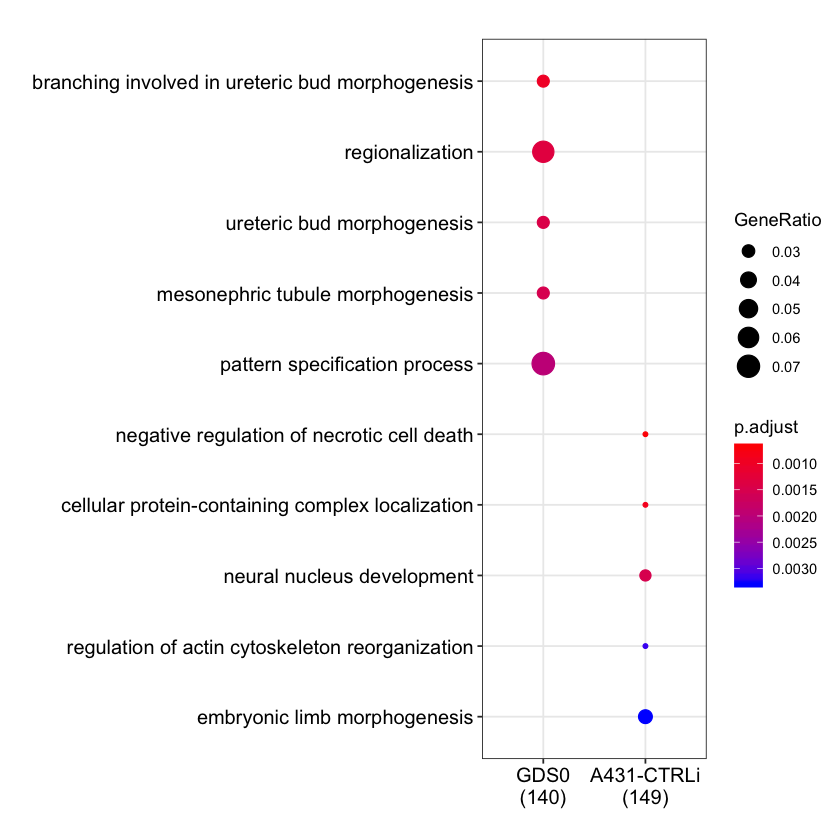

In [87]:
dotplot(ck_go_bp)
# dotplot(ck_reactome_90)
# ggsave(file = paste0(save_prefix, "ck_reactome_groups_SP4.pdf"),height=7, width=10)

In [ ]:
p4 <- emapplot(xx,pie="count", pie_scale=1.5, layout="kk")


In [24]:
ck_go_bp <- compareCluster(geneCluster = cluster_all, fun = "enrichGO", 
                                pAdjustMethod='BH', 
                                pvalueCutoff  = 0.05,
                                qvalueCutoff  = 0.05,
                                OrgDb='org.Hs.eg.db', 
                                ont = "BP",
                                readable=TRUE)
head(as.data.frame(ck_go_bp))
write.csv(ck_go_bp, file=paste0(save_prefix, 'ck_go_bp_05.csv'))

ck_go_mf <- compareCluster(geneCluster = cluster_all, fun = "enrichGO", 
                                pAdjustMethod='BH', 
                                pvalueCutoff  = 0.05,
                                qvalueCutoff  = 0.05,
                                OrgDb='org.Hs.eg.db', 
                                ont = "MF",
                                readable=TRUE)                              
head(as.data.frame(ck_go_mf))
write.csv(ck_go_mf, file=paste0(save_prefix, 'ck_go_mf_05.csv'))


ck_go_cc <- compareCluster(geneCluster = cluster_all, fun = "enrichGO", 
                                pAdjustMethod='BH', 
                                pvalueCutoff  = 0.05,
                                qvalueCutoff  = 0.05,
                                OrgDb='org.Hs.eg.db', 
                                ont = "CC",
                                readable=TRUE)
head(as.data.frame(ck_go_cc))
write.csv(ck_go_cc, file=paste0(save_prefix, 'ck_go_cc_05.csv'))

,Cluster,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<fct>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
1,purple,GO:0008544,epidermis development,129/2126,464/18670,7.904353e-23,4.875405e-19,3.904751e-19,ABCA12/ANXA1/APCDD1/ATP2A2/BCL2/BNC1/CALML5/CD109/CDH3/CELSR1/COL17A1/COL7A1/CSTA/CTSV/DKK1/DSC1/DSC2/DSC3/DSG1/DSG2/DSG3/DSP/EGFR/EREG/ERRFI1/EXPH5/FABP5/FGFR2/FLG2/FOSL2/FOXQ1/FST/GRHL1/GRHL2/GRHL3/HRNR/INHBA/IRF6/IVL/JAG1/JUP/KAZN/KEAP1/KLF4/KLF7/KLK5/KRT1/KRT13/KRT14/KRT15/KRT16/KRT17/KRT20/KRT23/KRT28/KRT31/KRT33A/KRT33B/KRT34/KRT36/KRT37/KRT39/KRT5/KRT6A/KRT6B/KRT6C/KRT74/KRT75/KRT78/KRT8/KRT80/KRT81/KRT82/KRT83/KRT84/KRT85/KRT86/KRT9/KRTAP1-1/KRTAP16-1/KRTAP17-1/KRTAP2-3/KRTAP2-4/KRTAP29-1/KRTAP3-2/KRTAP4-11/KRTAP4-6/KRTAP4-8/KRTAP9-7/LAMB3/LAMC2/LCE5A/LELP1/LGR4/LRTOMT/MYO5A/NAB2/NOTCH1/NUMA1/PAFAH1B1/PALLD/PERP/PKP1/POU2F3/PPARD/PRKCH/PTHLH/RBP2/RPTN/RUNX1/SATB1/SERPINB13/SFN/SLC4A7/SOS1/SOX9/SPINK5/SPINK6/SPINK9/SPRR2D/SPRR2F/SPRR2G/TCHH/TP63/TRIOBP/UGCG/YAP1/ZFP36L1/ZNF750,129
2,purple,GO:0070268,cornification,54/2126,112/18670,2.694018e-22,8.308352e-19,6.654225e-19,CSTA/DSC1/DSC2/DSC3/DSG1/DSG2/DSG3/DSP/IVL/JUP/KAZN/KLK5/KRT1/KRT13/KRT14/KRT15/KRT16/KRT17/KRT20/KRT23/KRT28/KRT31/KRT33A/KRT33B/KRT34/KRT36/KRT37/KRT39/KRT5/KRT6A/KRT6B/KRT6C/KRT74/KRT75/KRT78/KRT8/KRT80/KRT81/KRT82/KRT83/KRT84/KRT85/KRT86/KRT9/PERP/PKP1/RPTN/SPINK5/SPINK6/SPINK9/SPRR2D/SPRR2F/SPRR2G/TCHH,54
3,purple,GO:0030216,keratinocyte differentiation,92/2126,305/18670,3.698981e-19,7.605106e-16,6.090989e-16,ABCA12/ANXA1/CD109/CDH3/CSTA/CTSV/DSC1/DSC2/DSC3/DSG1/DSG2/DSG3/DSP/EREG/ERRFI1/EXPH5/FOSL2/GRHL1/GRHL2/HRNR/IRF6/IVL/JAG1/JUP/KAZN/KLK5/KRT1/KRT13/KRT14/KRT15/KRT16/KRT17/KRT20/KRT23/KRT28/KRT31/KRT33A/KRT33B/KRT34/KRT36/KRT37/KRT39/KRT5/KRT6A/KRT6B/KRT6C/KRT74/KRT75/KRT78/KRT8/KRT80/KRT81/KRT82/KRT83/KRT84/KRT85/KRT86/KRT9/KRTAP1-1/KRTAP16-1/KRTAP17-1/KRTAP2-3/KRTAP2-4/KRTAP29-1/KRTAP3-2/KRTAP4-11/KRTAP4-6/KRTAP4-8/KRTAP9-7/LCE5A/LELP1/NOTCH1/NUMA1/PALLD/PERP/PKP1/PRKCH/RPTN/RUNX1/SERPINB13/SFN/SPINK5/SPINK6/SPINK9/SPRR2D/SPRR2F/SPRR2G/TCHH/TP63/UGCG/YAP1/ZFP36L1,92
4,purple,GO:0043588,skin development,113/2126,419/18670,5.112409e-19,7.883335e-16,6.313826e-16,ABCA12/ANXA1/APCDD1/BCL2/CD109/CDH3/CELSR1/CLDN1/COL5A2/CSTA/CTSV/DKK1/DSC1/DSC2/DSC3/DSG1/DSG2/DSG3/DSP/EGFR/EREG/ERRFI1/EXPH5/FGFR2/FLG2/FOSL2/FOXQ1/FST/GRHL1/GRHL2/GRHL3/HRNR/INHBA/IRF6/ITGA2/ITGA6/IVL/JAG1/JUP/KAZN/KLK5/KRT1/KRT13/KRT14/KRT15/KRT16/KRT17/KRT20/KRT23/KRT28/KRT31/KRT33A/KRT33B/KRT34/KRT36/KRT37/KRT39/KRT5/KRT6A/KRT6B/KRT6C/KRT74/KRT75/KRT78/KRT8/KRT80/KRT81/KRT82/KRT83/KRT84/KRT85/KRT86/KRT9/KRTAP1-1/KRTAP16-1/KRTAP17-1/KRTAP2-3/KRTAP2-4/KRTAP29-1/KRTAP3-2/KRTAP4-11/KRTAP4-6/KRTAP4-8/KRTAP9-7/LCE5A/LELP1/LGR4/MET/MYO5A/NOTCH1/NUMA1/PALLD/PERP/PKP1/PRKCH/RPTN/RUNX1/SERPINB13/SFN/SOS1/SOX9/SPINK5/SPINK6/SPINK9/SPRR2D/SPRR2F/SPRR2G/STMN1/TCHH/TP63/UGCG/YAP1/ZFP36L1,113
5,purple,GO:0009913,epidermal cell differentiation,99/2126,358/18670,1.297138e-17,1.600149e-14,1.281572e-14,ABCA12/ANXA1/CD109/CDH3/CSTA/CTSV/DSC1/DSC2/DSC3/DSG1/DSG2/DSG3/DSP/EREG/ERRFI1/EXPH5/FOSL2/GRHL1/GRHL2/HRNR/IRF6/IVL/JAG1/JUP/KAZN/KEAP1/KLF4/KLF7/KLK5/KRT1/KRT13/KRT14/KRT15/KRT16/KRT17/KRT20/KRT23/KRT28/KRT31/KRT33A/KRT33B/KRT34/KRT36/KRT37/KRT39/KRT5/KRT6A/KRT6B/KRT6C/KRT74/KRT75/KRT78/KRT8/KRT80/KRT81/KRT82/KRT83/KRT84/KRT85/KRT86/KRT9/KRTAP1-1/KRTAP16-1/KRTAP17-1/KRTAP2-3/KRTAP2-4/KRTAP29-1/KRTAP3-2/KRTAP4-11/KRTAP4-6/KRTAP4-8/KRTAP9-7/LCE5A/LELP1/LRTOMT/NOTCH1/NUMA1/PAFAH1B1/PALLD/PERP/PKP1/PRKCH/RPTN/RUNX1/SERPINB13/SFN/SLC4A7/SPINK5/SPINK6/SPINK9/SPRR2D/SPRR2F/SPRR2G/TCHH/TP63/TRIOBP/UGCG/YAP1/ZFP36L1,99
6,purple,GO:0034330,cell junction organization,83/2126,290/18670,6.407880e-16,6.587300e-13,5.275821e-13,ACTN4/ANK2/ARF6/ARHGEF7/ARVCF/BCL2/BMP6/CAV1/CD9/CDH1/CDH17/CDH20/CDH26/CDH3/CLASP1/CLDN1/COL17A1/CORO1C/CORO2B/CTNND1/DLC1/DLG5/DSG1/DSG2/DSP/DST/EFNA5/F11R/F2R/F2RL1/FBLIM1/FSCN1/GJA1/GJB2/GRHL1/GRHL2/ITGA2/ITGA5/ITGA6/JUP/KIFC3/KRT14/KRT5/LAMB3/LAMC1/LA

,Cluster,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<fct>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
1,purple,GO:0050839,cell adhesion molecule binding,103/2077,499/17697,5.465178e-09,6.022626e-06,5.511200e-06,ABI1/ACTN4/ACVR1/ADAMTS8/ANXA1/ANXA2/ARHGAP18/ARVCF/ATIC/BAG3/BAIAP2/CALD1/CCN4/CCN6/CD9/CDC42EP1/CDH1/CDH17/CDH20/CDH26/CDH3/CDK5R1/CLINT1/COBLL1/CRKL/CTNND1/DNAJB1/DOCK9/DSG2/DSP/DST/EGFR/EPN2/ERC1/ESM1/F11R/FSCN1/FXYD5/GIPC1/GLOD4/HDLBP/HMCN1/HSPA8/IL1B/ITGA2/ITGA5/ITGA6/ITGB1/ITGB6/JAML/JUP/KIF5B/LAD1/LYN/MACF1/MAPRE1/MARK2/MICALL1/MPP7/MYO1B/NDRG1/NECTIN1/NECTIN4/NOTCH3/NPTN/NRG1/PARK7/PDLIM1/PHLDB2/PICALM/PKM/PKP1/PPFIBP1/PSMB6/PTPN1/PTPRD/PTPRO/PTPRZ1/RPL14/RPL29/S100A11/SEMA7A/SEPTIN2/SERBP1/SFN/SLC14A2/SLK/SNX2/SNX9/SPTBN1/SRC/STK24/SYK/TENM2/TENM4/TES/THBS1/TJP2/TMOD3/TNKS1BP1/TRIM29/UBAP2/YWHAZ,103
2,purple,GO:0045296,cadherin binding,75/2077,331/17697,1.184463e-08,6.526392e-06,5.972187e-06,ABI1/ACVR1/ANXA1/ANXA2/ARHGAP18/ARVCF/ATIC/BAG3/BAIAP2/CALD1/CDC42EP1/CDH1/CDH17/CDH20/CDH26/CDH3/CDK5R1/CLINT1/COBLL1/CRKL/CTNND1/DNAJB1/DOCK9/EGFR/EPN2/ERC1/F11R/FSCN1/FXYD5/GIPC1/GLOD4/HDLBP/HSPA8/ITGA6/ITGB1/JUP/KIF5B/LAD1/MACF1/MAPRE1/MARK2/MICALL1/MPP7/MYO1B/NDRG1/NOTCH3/PARK7/PDLIM1/PHLDB2/PICALM/PKM/PKP1/PPFIBP1/PSMB6/PTPN1/PTPRO/RPL14/RPL29/S100A11/SEPTIN2/SERBP1/SFN/SLK/SNX2/SNX9/SPTBN1/SRC/STK24/TES/TJP2/TMOD3/TNKS1BP1/TRIM29/UBAP2/YWHAZ,75
3,purple,GO:0003779,actin binding,86/2077,431/17697,4.638139e-07,1.703743e-04,1.559066e-04,ABLIM1/ACTN4/ACTR3/ARPC1A/CALD1/CAP1/CAPZA2/CDK5R1/COBLL1/CORO1C/CORO2B/CORO6/DAAM1/DIAPH1/DIXDC1/DST/EGFR/EVL/FBXO25/FGD4/FHOD1/FHOD3/FMNL3/FSCN1/FXYD5/GIPC1/GSN/IMPACT/INO80/IQGAP2/ITGB1/ITPRID2/JMY/KCNMA1/KLHL2/MACF1/MARCKS/MICAL2/MRTFA/MTSS1/MYO10/MYO16/MYO1B/MYO1E/MYO5A/MYO5B/MYOM3/MYOZ2/MYPN/MYRIP/NOD2/PALLD/PANX1/PAWR/PDLIM1/PHACTR1/POF1B/PTK2/SHROOM2/SHROOM3/SHROOM4/SLC6A2/SMTN/SORBS1/SPIRE1/SPTBN1/SSH1/SSH2/STK38L/SVIL/SYNE1/SYNE2/SYNPO2/TMOD3/TNNI1/TNNT2/TPM1/TRIOBP/TRPC6/TRPV4/VASH1/WASF1/WASL/WDR1/YWHAH/ZNF185,86
4,purple,GO:0005088,Ras guanyl-nucleotide exchange factor activity,34/2077,137/17697,1.533668e-05,4.225255e-03,3.866458e-03,ADRB1/AKAP13/ARHGEF10/ARHGEF10L/ARHGEF28/ARHGEF37/ARHGEF4/ARHGEF7/C9orf72/DENND1B/DENND2C/DENND6A/DNMBP/ECT2L/FGD2/FGD4/FGD6/ITSN1/MCF2L2/NET1/PLEKHG3/PLEKHG4/PLEKHG5/PLEKHG6/RAB3GAP2/RAB3IP/RAPGEF1/RAPGEF3/RAPGEF4/RAPGEF5/RASGEF1B/RCBTB2/RIN2/SOS1,34
5,purple,GO:0045499,chemorepellent activity,12/2077,27/17697,2.105613e-05,4.359828e-03,3.989603e-03,EFNA5/FLRT2/FLRT3/NRG1/SEMA3A/SEMA3C/SEMA3F/SEMA4B/SEMA4F/SEMA5B/SEMA6D/SEMA7A,12
6,purple,GO:0098631,cell adhesion mediator activity,19/2077,59/17697,2.580841e-05,4.359828e-03,3.989603e-03,ANXA1/ANXA2/BAIAP2/CD200/CDC42EP1/DSC2/DSG2/DSP/ITGA2/ITGB1/JUP/MYPN/NPTN/PALLD/PDLIM1/S100A11/SIRPA/TMOD3/TRIM29,19


,Cluster,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<fct>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
1,purple,GO:0005911,cell-cell junction,116/2213,459/19717,1.348479e-17,9.371928e-15,8.261207e-15,ABCC2/ACTN4/ACTR3/ADGRL3/AKAP6/AKR1B1/AMOTL1/ANK2/ANXA1/ANXA2/ARVCF/ATP2A2/B4GALT1/BAIAP2/CD2/CD3E/CD99L2/CDC42EP1/CDC42EP4/CDH1/CDH17/CDH20/CDH26/CDH3/CLDN1/CLDN14/CLDN16/CLDN17/CLDN8/COL17A1/CTNND1/CYTH1/CYTH3/DLG5/DNMBP/DPP4/DSC1/DSC2/DSC3/DSG1/DSG2/DSG3/DSP/EPB41L4B/F11R/FABP7/FAT1/FAT2/FHOD1/FLRT2/FLRT3/FRMD4B/FRMD6/FSCN1/GJA1/GJA10/GJB2/GRHL2/HMCN1/ITGA5/ITGA6/ITGB1/JAML/JCAD/JUP/KAZN/KIFC3/KRT8/LAMA1/LSR/LYN/MAGI1/MPP7/MYO1E/NDRG1/NECTIN1/NECTIN4/NHS/PANX1/PARD3/PARD6G/PARK7/PCDHGA12/PDLIM1/PDZD2/PERP/PKD2/PKP1/PLEKHA7/PLEKHG5/POF1B/PTK7/PTPRK/RAP2B/S100A11/SCN1A/SH3KBP1/SHROOM2/SHROOM3/SHROOM4/SLC2A1/SLC5A1/SMAD7/SORBS1/SSX2IP/TBCD/TGFBR1/TJP2/TMEM65/TMOD3/TNKS1BP1/TRIM29/TRPC6/USP53/WDR1/YWHAH,116
2,purple,GO:0031252,cell leading edge,92/2213,403/19717,1.649371e-11,5.731564e-09,5.052284e-09,AAK1/ABI1/ABLIM1/ACTG2/ACTR3/AMOTL1/ANXA2/ARF6/ARHGEF4/ARHGEF7/ATP6V1B2/BAIAP2/BCAR1/BMX/C2CD5/CD44/CDH1/CLIP1/CORO1C/CSPG4/CTNND1/CYTH3/DIAPH1/DLC1/DPP4/DST/DUOX1/DUOX2/DYNLT1/DYSF/EVL/FAT1/FGD2/FGD4/FGD6/FRMD4B/FSCN1/GABARAPL1/GSN/IQGAP2/ITGA5/ITGB1/ITSN1/JCAD/JMY/KANK1/KITLG/KLHL2/LAYN/MACF1/MCC/MTSS1/MYO10/MYO5A/NEDD9/NHS/PAFAH1B1/PALLD/PHLDB2/PKD2/PLEKHA1/PLEKHG5/PSD3/PSD4/PTK2/PTPN13/PTPRK/PTPRO/RAB3IP/RAC1/RAPGEF3/ROBO2/S100A11/S100A6/SH3RF1/SLC1A2/SLC39A14/SLK/SNX2/SNX9/SPTBN1/SRC/SSH1/SSX2IP/SYNE2/THEM4/TPM1/TRPV1/TRPV4/VEZT/WASF1/WASL,92
3,purple,GO:0005913,cell-cell adherens junction,40/2213,117/19717,3.865182e-11,8.954338e-09,7.893108e-09,ANXA1/ANXA2/ARVCF/ATP2A2/BAIAP2/CD99L2/CDC42EP1/CDC42EP4/CDH1/CDH17/CDH20/CDH26/CDH3/CTNND1/DLG5/DSC2/DSP/FAT2/GJA1/HMCN1/ITGA6/JUP/KIFC3/LYN/NDRG1/NECTIN1/NECTIN4/PARD3/PARK7/PDLIM1/PKP1/PLEKHA7/S100A11/SHROOM2/SMAD7/SORBS1/SSX2IP/TMOD3/TNKS1BP1/TRIM29,40
4,purple,GO:0045111,intermediate filament cytoskeleton,65/2213,251/19717,6.141088e-11,1.067014e-08,9.405561e-09,CLIP1/CLK3/CSNK1A1/CTNS/DDX60/DSP/DST/GJA1/IFFO2/INO80/JUP/KRT1/KRT13/KRT14/KRT15/KRT16/KRT17/KRT20/KRT23/KRT28/KRT31/KRT33A/KRT33B/KRT34/KRT36/KRT37/KRT39/KRT5/KRT6A/KRT6B/KRT6C/KRT74/KRT75/KRT78/KRT8/KRT80/KRT81/KRT82/KRT83/KRT84/KRT85/KRT86/KRT9/KRTAP1-1/KRTAP16-1/KRTAP17-1/KRTAP2-3/KRTAP2-4/KRTAP29-1/KRTAP3-2/KRTAP4-11/KRTAP4-12/KRTAP4-6/KRTAP4-8/KRTAP9-7/MACF1/MYO5A/NOL9/NRP1/NSFL1C/PHLDB2/PKP1/SMARCA2/STN1/SYNE2,65
5,purple,GO:0005882,intermediate filament,55/2213,214/19717,2.407229e-09,3.346049e-07,2.949489e-07,CLIP1/CSNK1A1/DSP/DST/GJA1/IFFO2/JUP/KRT1/KRT13/KRT14/KRT15/KRT16/KRT17/KRT20/KRT23/KRT28/KRT31/KRT33A/KRT33B/KRT34/KRT36/KRT37/KRT39/KRT5/KRT6A/KRT6B/KRT6C/KRT74/KRT75/KRT78/KRT8/KRT80/KRT81/KRT82/KRT83/KRT84/KRT85/KRT86/KRT9/KRTAP1-1/KRTAP16-1/KRTAP17-1/KRTAP2-3/KRTAP2-4/KRTAP29-1/KRTAP3-2/KRTAP4-11/KRTAP4-12/KRTAP4-6/KRTAP4-8/KRTAP9-7/MACF1/MYO5A/NRP1/PKP1,55
6,purple,GO:0005925,focal adhesion,84/2213,405/19717,1.599897e-08,1.686252e-06,1.486405e-06,ACTN4/ACTR3/ALCAM/ANXA1/ARF6/ARHGEF7/BCAR1/CAP1/CAV1/CAV2/CD44/CD9/CD99L2/CDC42EP1/CLASP1/CORO1C/CORO2B/CSPG4/DIXDC1/DLC1/DPP4/DST/EFNB2/EGFR/EVL/FAT1/FBLIM1/FLRT2/FLRT3/GJA1/GSN/HSPA8/HSPB1/IGF2R/IRF2/ITGA2/ITGA5/ITGA6/ITGB1/ITGB6/JUP/KLF11/LAYN/LMO7/LPP/LRP1/MAP4K4/MAPRE1/MARCKS/MME/NEDD9/NHS/NOX4/NRP1/PALLD/PDLIM1/PHLDB2/PLAUR/PPFIBP1/PPP1CB/PTK2/PTK7/PTPN12/RAB21/RAC1/RND3/RPL10A/RPL37A/RRAS2/SH3KBP1/SORBS1/SVIL/SYNE2/SYNPO2/TES/TM4SF20/TNC/TNS3/TRIOBP/TRPV4/WASF1/YWHAG/YWHAZ/ZNF185,84


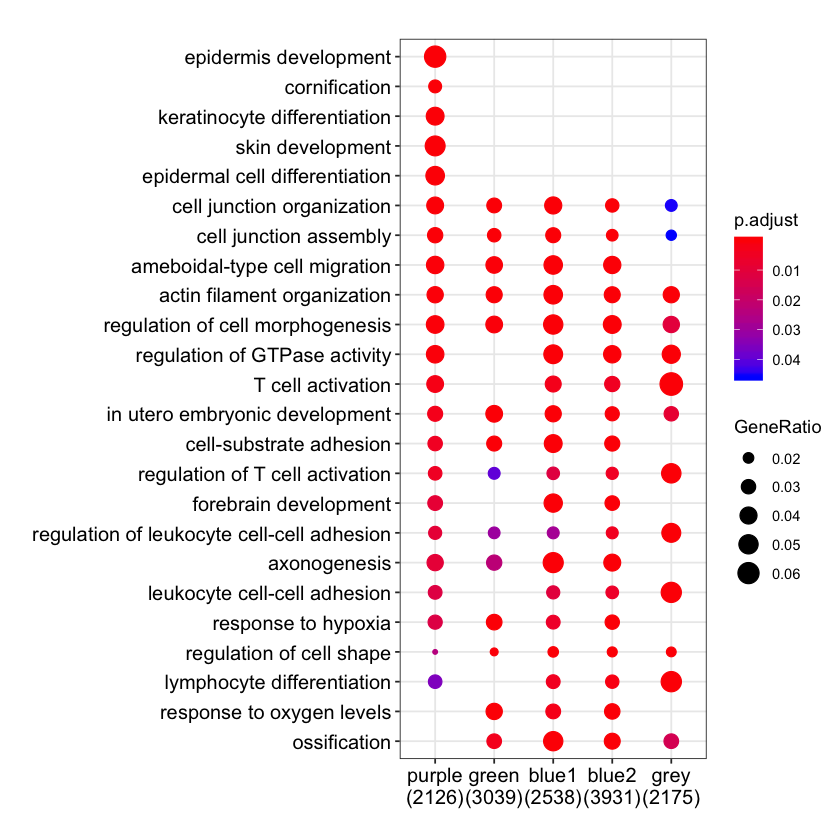

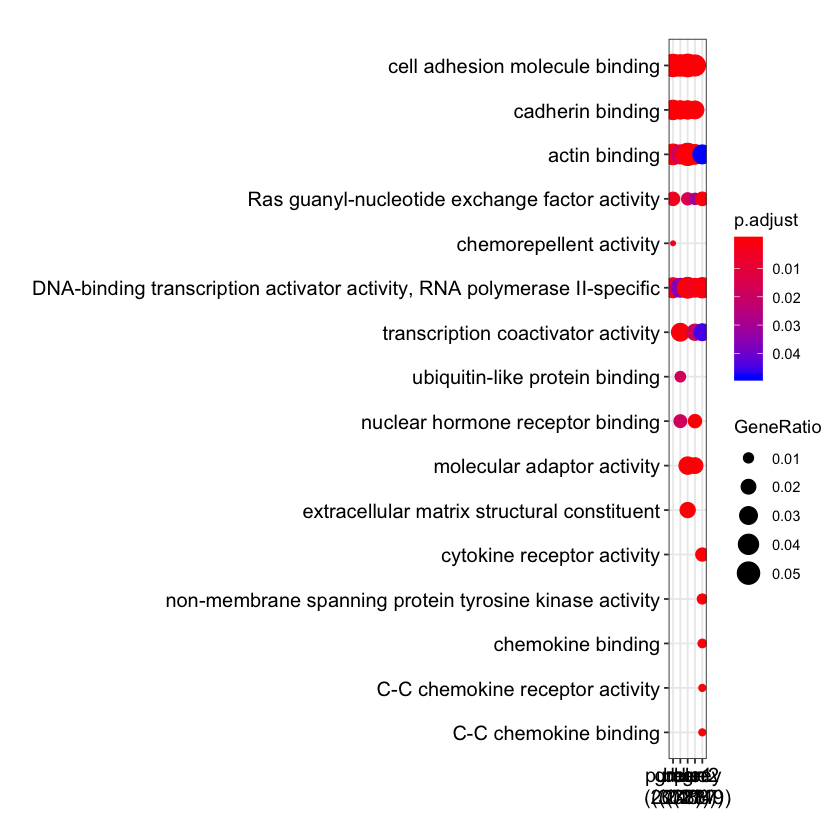

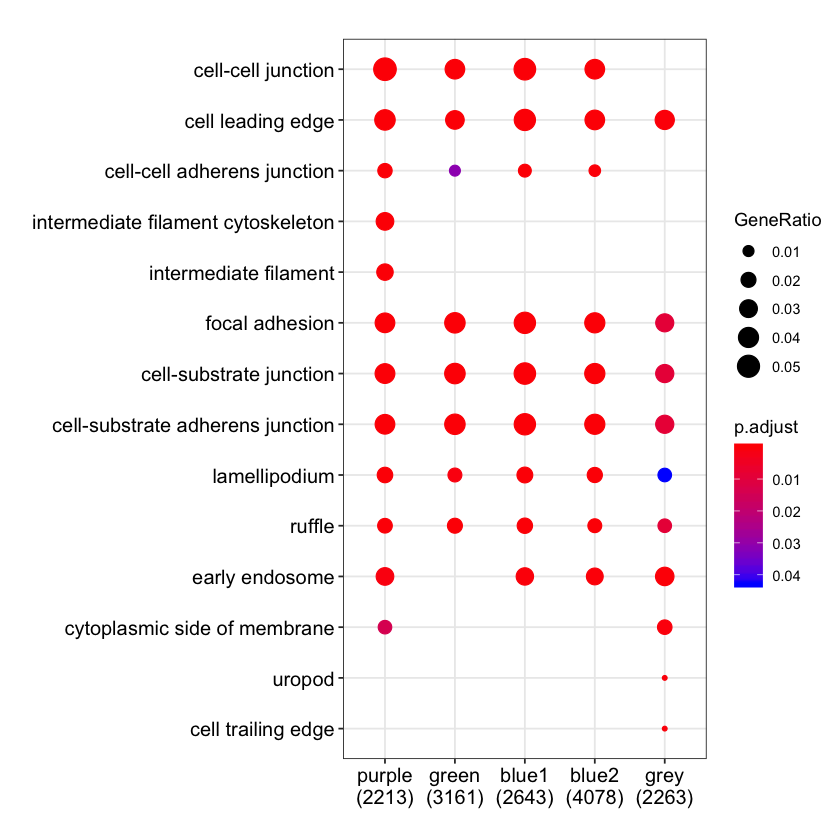

In [25]:
dotplot(ck_go_bp)
ggsave(file = paste0(save_prefix, "ck_go_bp_groups.pdf"),height=7, width=10)
dotplot(ck_go_mf)
ggsave(file = paste0(save_prefix, "ck_go_mf_groups.pdf"),height=7, width=10)
dotplot(ck_go_cc)
ggsave(file = paste0(save_prefix, "ck_go_cc_groups.pdf"),height=7, width=10)